# DataFrame 합치기
*   merge: 두 개 이상의 데이터프레임을 공통된 컬럼(들)을 기준으로 합치는 것.
*   SQL의 join과 비슷.
*   concat: 두 개 이상의 데이터프레임을 축(axis)을 따라서 합치는 것.

# merge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
emp = pd.DataFrame(data = {
    'empno': [100,101,200,202],
    'ename': ['Scott','Tiger','King','오쌤'],
    'deptno': [10,20,10,50]
})
emp

,empno,ename,deptno
0,100,Scott,10
1,101,Tiger,20
2,200,King,10
3,202,오쌤,50


In [3]:
dept = pd.DataFrame(data = {
    'deptno': [10,20,30],
    'dname': ['HR','IT','Sales']
})
dept

,deptno,dname
0,10,HR
1,20,IT
2,30,Sales


*   `pd.merge(left, right, how, on, ...)` 함수
*   `pd.DataFrame.merge(right, how, on,...)` 메서드
*   파라미터 how: merge 방식(inner, left, right, outer). 기본값은 'inner'.
*   파라미터 on: join의 기준이 되는 컬럼(들의 리스트). join 컬럼 이름이 같은 경우에는 생략 가능.

## inner join

In [4]:
pd.merge(emp, dept)

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR


In [5]:
emp.merge(dept)

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR


## left (outer) join

In [6]:
pd.merge(emp, dept, how = 'left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR
3,202,오쌤,50,NaN


In [7]:
emp.merge(dept, how = 'left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR
3,202,오쌤,50,NaN


## right (outer) join

In [8]:
pd.merge(emp, dept, how = 'right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales


In [9]:
emp.merge(dept, how = 'right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales


## full (outer) join

In [10]:
pd.merge(emp, dept, how = 'outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales
4,202.0,오쌤,50,NaN


In [11]:
emp.merge(dept, how = 'outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales
4,202.0,오쌤,50,NaN


## join 기준 컬럼 이름이 다른 경우

In [12]:
emp

,empno,ename,deptno
0,100,Scott,10
1,101,Tiger,20
2,200,King,10
3,202,오쌤,50


In [13]:
dept2 = pd.DataFrame(data = {
    'dno': [10,20,30],
    'dname': ['인사','아이티','영업']
})
dept2

,dno,dname
0,10,인사
1,20,아이티
2,30,영업


In [14]:
# inner join
pd.merge(emp, dept2, left_on = 'deptno', right_on = 'dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10,인사
1,101,Tiger,20,20,아이티
2,200,King,10,10,인사


In [15]:
# left (outer) join
pd.merge(emp, dept2, how= 'left', left_on= 'deptno', right_on = 'dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10.0,인사
1,101,Tiger,20,20.0,아이티
2,200,King,10,10.0,인사
3,202,오쌤,50,NaN,NaN


In [16]:
# right (outer) join
pd.merge(emp, dept2, how= 'right', left_on= 'deptno', right_on= 'dno')

,empno,ename,deptno,dno,dname
0,100.0,Scott,10.0,10,인사
1,200.0,King,10.0,10,인사
2,101.0,Tiger,20.0,20,아이티
3,NaN,NaN,NaN,30,영업


In [17]:
# full (outer) join
pd.merge(emp, dept2, how= 'outer', left_on= 'deptno', right_on= 'dno')

,empno,ename,deptno,dno,dname
0,100.0,Scott,10.0,10.0,인사
1,200.0,King,10.0,10.0,인사
2,101.0,Tiger,20.0,20.0,아이티
3,NaN,NaN,NaN,30.0,영업
4,202.0,오쌤,50.0,NaN,NaN


## 인덱스(row label)로 merge

In [18]:
np.random.seed(1)

In [19]:
df1 = pd.DataFrame(data = {
    'value1': np.random.randint(10, size = 6),
    'value2': np.random.randint(100, size =6)},

    index = ['a','b','c'] * 2)
df1

,value1,value2
a,5,1
b,8,76
c,9,71
a,5,6
b,0,25
c,0,50


In [20]:
df2 = pd.DataFrame(data = {
    'data1': np.random.rand(3),
    'data2': np.random.randn(3)},

    index = [ 'a','b','c'])

df2

,data1,data2
a,0.846311,-1.507808
b,0.313274,-0.315292
c,0.524548,0.858179


In [21]:
pd.merge(df1, df2, left_index= True, right_index = True)

,value1,value2,data1,data2
a,5,1,0.846311,-1.507808
b,8,76,0.313274,-0.315292
c,9,71,0.524548,0.858179
a,5,6,0.846311,-1.507808
b,0,25,0.313274,-0.315292
c,0,50,0.524548,0.858179


In [22]:
df1 = pd.DataFrame(data={
    'value1': np.random.randint(100, size = 6),
    'value2': ['a', 'b', 'c'] * 2
})
df1

,value1,value2
0,87,a
1,94,b
2,96,c
3,86,a
4,13,b
5,9,c


In [23]:
df2 = pd.DataFrame(data={'value3': np.arange(10, 40, 10)},
                   index=['a', 'b', 'c'])
df2


,value3
a,10
b,20
c,30


In [24]:
# df1과 df2를 merge
pd.merge(df1, df2, left_on = 'value2', right_index = True)

,value1,value2,value3
0,87,a,10
1,94,b,20
2,96,c,30
3,86,a,10
4,13,b,20
5,9,c,30


# concat

## Series에서의 concat

In [25]:
s1 = pd.Series(data = ['Scott', 'Allen', 'King'])
s1

,0
0,Scott
1,Allen
2,King


In [26]:
s2 = pd.Series(data = ['오쌤', '홍길동'])
s2

,0
0,오쌤
1,홍길동


In [27]:
pd.concat([s1, s2] )

,0
0,Scott
1,Allen
2,King
0,오쌤
1,홍길동


In [28]:
pd.concat([s1,s2], ignore_index = True)

,0
0,Scott
1,Allen
2,King
3,오쌤
4,홍길동


In [29]:
s3 = pd.Series(data = ['HR','IT','HR'])
s3

,0
0,HR
1,IT
2,HR


In [30]:
pd.concat([s1,s3], axis= 1)

,0,1
0,Scott,HR
1,Allen,IT
2,King,HR


## DataFrame에서의 concat

In [31]:
np.random.seed(1)

day1_df = pd.DataFrame(data = np.random.randint(100, size = (5,3)),
                       columns = ['A', 'B','C'])

day1_df

,A,B,C
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50


In [32]:
day2_df = pd.DataFrame(data = np.random.randint(100, size = (5, 3)),
                       columns = [ 'A','B','C'])
day2_df

,A,B,C
0,20,18,84
1,11,28,29
2,14,50,68
3,87,87,94
4,96,86,13


In [33]:
pd.concat([day1_df, day2_df], ignore_index = True )          # axis = 0 기본값

,A,B,C
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50
5,20,18,84
6,11,28,29
7,14,50,68
8,87,87,94
9,96,86,13


In [34]:
df = pd.DataFrame(data = np.random.rand(5,3),
                  columns = ['d','e','f'])
df

,d,e,f
0,0.715971,0.802758,0.092801
1,0.518153,0.865020,0.829147
2,0.829603,0.273050,0.059243
3,0.670528,0.593066,0.671654
4,0.411788,0.197551,0.289630


In [35]:
pd.concat([day1_df, df], axis = 1)

,A,B,C,d,e,f
0,37,12,72,0.715971,0.802758,0.092801
1,9,75,5,0.518153,0.865020,0.829147
2,79,64,16,0.829603,0.273050,0.059243
3,1,76,71,0.670528,0.593066,0.671654
4,6,25,50,0.411788,0.197551,0.289630


# merge, concat 연습1

*   https://github.com/pandas-dev/pandas/tree/main/doc/data 데이터 사용
*   air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고, 각각 데이터프레임 생성
*   air_quality_no2와 air_quality_pm25 데이터프레임 합치기
*   위에서 만들어진 데이터프레임과 air_quality_stations 데이터프레임 합치기.

In [36]:
aq_no2_path = 'https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/air_quality_no2_long.csv'

In [37]:
aq_no2 = pd.read_csv(aq_no2_path)
aq_no2

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [38]:
air_quality_pm25_long_path = 'https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/air_quality_pm25_long.csv'

In [39]:
aq_pm25 = pd.read_csv(air_quality_pm25_long_path)
aq_pm25

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [40]:
air_quality_stations_path = 'https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/air_quality_stations.csv'

In [41]:
aq_stations = pd.read_csv(air_quality_stations_path)
aq_stations

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [42]:
aq_no2_pm25 = pd.merge(aq_no2, aq_pm25, left_on= 'location', right_on = 'location')
aq_no2_pm25

,city_x,country_x,date.utc_x,location,parameter_x,value_x,unit_x,city_y,country_y,date.utc_y,parameter_y,value_y,unit_y
0,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-18 06:00:00+00:00,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 08:00:00+00:00,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 07:00:00+00:00,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 06:00:00+00:00,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 05:00:00+00:00,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987311,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 06:00:00+00:00,pm25,9.0,µg/m³
987312,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 04:00:00+00:00,pm25,8.0,µg/m³
987313,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 03:00:00+00:00,pm25,8.0,µg/m³
987314,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 02:00:00+00:00,pm25,8.0,µg/m³


In [43]:
aq_no2_pm25 = aq_no2_pm25.loc[:, ~aq_no2_pm25.columns.duplicated()]
aq_no2_pm25

,city_x,country_x,date.utc_x,location,parameter_x,value_x,unit_x,city_y,country_y,date.utc_y,parameter_y,value_y,unit_y
0,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-18 06:00:00+00:00,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 08:00:00+00:00,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 07:00:00+00:00,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 06:00:00+00:00,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,Antwerpen,BE,2019-06-17 05:00:00+00:00,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987311,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 06:00:00+00:00,pm25,9.0,µg/m³
987312,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 04:00:00+00:00,pm25,8.0,µg/m³
987313,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 03:00:00+00:00,pm25,8.0,µg/m³
987314,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,London,GB,2019-05-07 02:00:00+00:00,pm25,8.0,µg/m³


In [44]:
aq_no2_pm25.drop(columns=['city_y', 'country_y', 'date.utc_y'], inplace=True)

In [45]:
aq_no2_pm25

,city_x,country_x,date.utc_x,location,parameter_x,value_x,unit_x,parameter_y,value_y,unit_y
0,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...,...,...,...
987311,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,9.0,µg/m³
987312,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,8.0,µg/m³
987313,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,8.0,µg/m³
987314,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,8.0,µg/m³


In [46]:
df = pd.merge(aq_no2_pm25, aq_stations, left_on = 'location', right_on = 'location')
df

,city_x,country_x,date.utc_x,location,parameter_x,value_x,unit_x,parameter_y,value_y,unit_y,coordinates.latitude,coordinates.longitude
0,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,18.0,µg/m³,51.20966,4.43182
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,6.5,µg/m³,51.20966,4.43182
2,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,18.5,µg/m³,51.20966,4.43182
3,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,16.0,µg/m³,51.20966,4.43182
4,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³,pm25,7.5,µg/m³,51.20966,4.43182
...,...,...,...,...,...,...,...,...,...,...,...,...
987311,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,9.0,µg/m³,51.49467,-0.13193
987312,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,8.0,µg/m³,51.49467,-0.13193
987313,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,8.0,µg/m³,51.49467,-0.13193
987314,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,pm25,8.0,µg/m³,51.49467,-0.13193


### 오쌤방법

In [47]:
# 파일 경로
no2_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_no2_long.csv'
pm25_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_pm25_long.csv'
stations_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_stations.csv'


#### air_quality_no2 데이터프레임

In [48]:
no2_df = pd.read_csv(no2_file)

In [49]:
no2_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [50]:
no2_df.tail()

,city,country,date.utc,location,parameter,value,unit
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³


In [51]:
no2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [52]:
no2_df.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [53]:
no2_df.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [54]:
no2_df.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [55]:
no2_df.parameter.unique()

array(['no2'], dtype=object)

In [56]:
no2_df.value.describe()


,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


#### air_quality_pm25 데이터프레임


In [57]:
pm25_df = pd.read_csv(pm25_file)

In [58]:
pm25_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [59]:
pm25_df.tail()


,city,country,date.utc,location,parameter,value,unit
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [60]:
pm25_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [61]:
pm25_df.city.unique()


array(['Antwerpen', 'London'], dtype=object)

In [62]:
pm25_df.location.unique()


array(['BETR801', 'London Westminster'], dtype=object)

#### air_quality_stations 데이터프레임


In [63]:
stations_df = pd.read_csv(stations_file)


In [64]:
stations_df.head()


,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [65]:
stations_df.tail()


,location,coordinates.latitude,coordinates.longitude
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216
65,Groton Fort Griswold,41.35360,-72.07890


In [66]:
stations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [67]:
stations_df[stations_df.location.isin(['FR04014', 'BETR801', 'London Westminster'])]


,location,coordinates.latitude,coordinates.longitude
9,BETR801,51.20966,4.43182
26,FR04014,48.83724,2.39390
27,FR04014,48.83722,2.39390
60,London Westminster,51.49467,-0.13193


In [68]:
stations_df_new = stations_df.drop(labels = 27)         # 행 인덱스 27번을 삭제

In [69]:
stations_df_new[stations_df_new.location.isin(['FR04014', 'BETR801', 'London Westminster'])]

,location,coordinates.latitude,coordinates.longitude
9,BETR801,51.20966,4.43182
26,FR04014,48.83724,2.39390
60,London Westminster,51.49467,-0.13193


#### no2와 pm25 데이터프레임 concat

In [70]:
air_quality = pd.concat([no2_df, pm25_df],ignore_index = True)


In [71]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [72]:
air_quality.tail()

,city,country,date.utc,location,parameter,value,unit
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [73]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       3178 non-null   object 
 1   country    3178 non-null   object 
 2   date.utc   3178 non-null   object 
 3   location   3178 non-null   object 
 4   parameter  3178 non-null   object 
 5   value      3178 non-null   float64
 6   unit       3178 non-null   object 
dtypes: float64(1), object(6)
memory usage: 173.9+ KB


In [74]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [75]:
air_quality.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [76]:
air_quality.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

#### air_quality, station_df_new 데이터프레인 merge

In [77]:
air_quality = pd.merge(air_quality, stations_df_new)
air_quality

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.39390
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


In [78]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   3178 non-null   object 
 1   country                3178 non-null   object 
 2   date.utc               3178 non-null   object 
 3   location               3178 non-null   object 
 4   parameter              3178 non-null   object 
 5   value                  3178 non-null   float64
 6   unit                   3178 non-null   object 
 7   coordinates.latitude   3178 non-null   float64
 8   coordinates.longitude  3178 non-null   float64
dtypes: float64(3), object(6)
memory usage: 223.6+ KB


In [79]:
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'], utc = True)

In [80]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   city                   3178 non-null   object             
 1   country                3178 non-null   object             
 2   date.utc               3178 non-null   datetime64[ns, UTC]
 3   location               3178 non-null   object             
 4   parameter              3178 non-null   object             
 5   value                  3178 non-null   float64            
 6   unit                   3178 non-null   object             
 7   coordinates.latitude   3178 non-null   float64            
 8   coordinates.longitude  3178 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 223.6+ KB


In [81]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939


#### London의 NO2, PM25 농도 시계열 그래프

In [82]:
london_df = air_quality[air_quality.city == 'London']

In [83]:
london_df.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
1099,London,GB,2019-06-17 11:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1100,London,GB,2019-06-17 10:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1101,London,GB,2019-06-17 09:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1102,London,GB,2019-06-17 08:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
1103,London,GB,2019-06-17 07:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193


In [84]:
london_df.tail()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


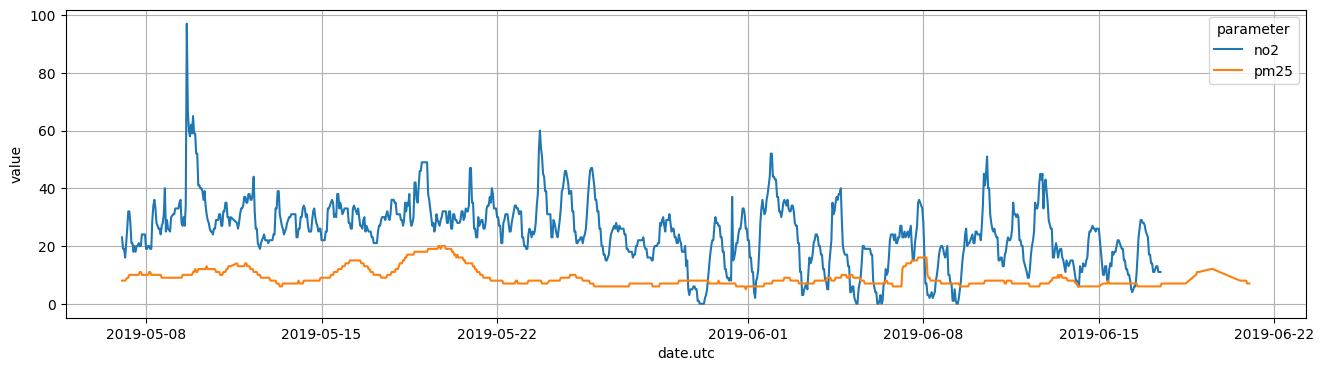

In [85]:
fig = plt.figure(figsize= (16,4))
sns.lineplot(data = london_df, x = 'date.utc', y = 'value',hue = 'parameter')
plt.grid()
plt.show()

# merge, concat 연습 2. 신생아 이름 데이터셋

*   https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames 데이터 파일들을 사용
*   1880년부터 2010년까지 미국 신생아들의 이름, 성별, 출생자수가 정리된 파일
*   파일을 하나씩 읽어서 데이터 프레임 생성하세요.
*   생성된 데이터 프레임에 year 컬럼을 추가하세요.
*   생성된 131개의 데이터 프레임을 하나로 합치세요.
*   연도별 신생아 수를 찾고 그래프를 그리세요.
*   연도별 성별 신생아 수를 찾고 그래프를 그리세요.

In [86]:
result = []

for x in range(1880, 2010):
    url = f'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob{x}.txt'
    df = pd.read_csv(url, names=['name', 'sex', 'births'])
    df['year'] = x
    result.append(df)


In [87]:
baby_names = pd.concat(result, ignore_index=True)
baby_names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1656941,Zyquarius,M,5,2009
1656942,Zyran,M,5,2009
1656943,Zyreion,M,5,2009
1656944,Zyrian,M,5,2009


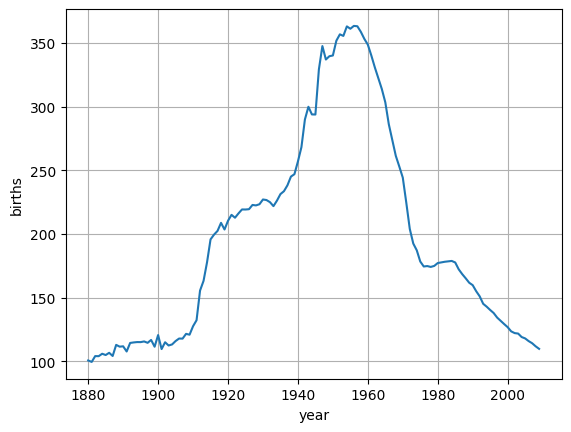

In [88]:
# 연도별 신생아 수를 찾고 그래프를 그리세요.
sns.lineplot(data = baby_names, x= 'year', y = 'births', errorbar= None)
plt.grid()
plt.show()

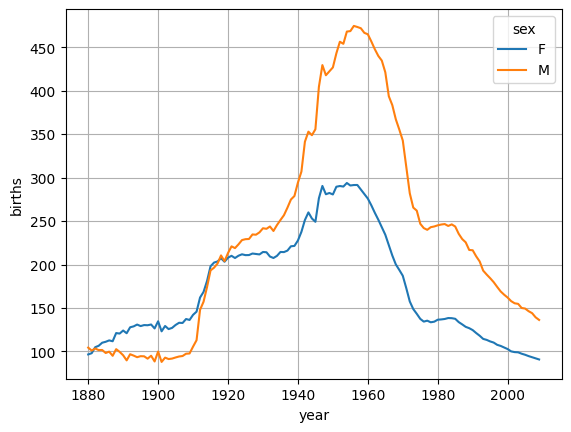

In [89]:
# 연도별 성별 신생아 수를 찾고 그래프를 그리세요
sns.lineplot(data = baby_names, x= 'year', y = 'births', hue= 'sex', errorbar= None)
plt.grid()
plt.show()


### 오쌤 방법

In [93]:
col_names= ['name','gender','births']       # 데이터프레임 칼럼 이름

yobs = []       # 각 연도의 데이터프레임을 저장할 빈 리스트
for year in range(1880, 2011):
    # txt파일이 저장된 github 경로
    file_path = f'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob{year}.txt'
    # 파일을 읽어서 데이터 프레임 생성.
    yob_year = pd.read_csv(file_path, names = col_names)
    # 데이터프레임에 year 파생변수를 추가
    yob_year['year'] = year
    # 생성된 데이터 프레임을 리스트에 추가
    yobs.append(yob_year)


In [94]:
len(yobs)           # 리스트의 원소 갸수 - 데이터프레임 개수

131

In [96]:
yobs[0]         # 리스트의 첫번째 원소 -> 1880년 데이터 프레임

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [98]:
yobs[-1]        # 리스트의 마지막 원소 -> 2010 데이터 프레임

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [100]:
yob_df = pd.concat(yobs, ignore_index = True)

In [102]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


#### 연도별 신생아수

In [107]:
yob_by_year = yob_df.groupby(by = ['year']).births.sum()

In [108]:
yob_by_year.head()

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466


In [109]:
yob_by_year.tail()

,births
year,
2006,3946702
2007,3986130
2008,3915955
2009,3801002
2010,3657392


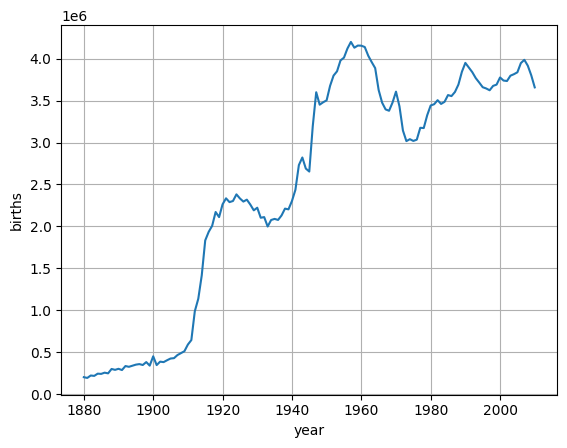

In [111]:
sns.lineplot(data=yob_by_year)
plt.grid()
plt.show()

#### 연도별 성별 신생아수

In [112]:
yob_by_year_gender = yob_df.groupby(by= ['year','gender']).births.sum()

In [113]:
yob_by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [115]:
df_by_year__gender = yob_by_year_gender.reset_index()

In [116]:
df_by_year__gender

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


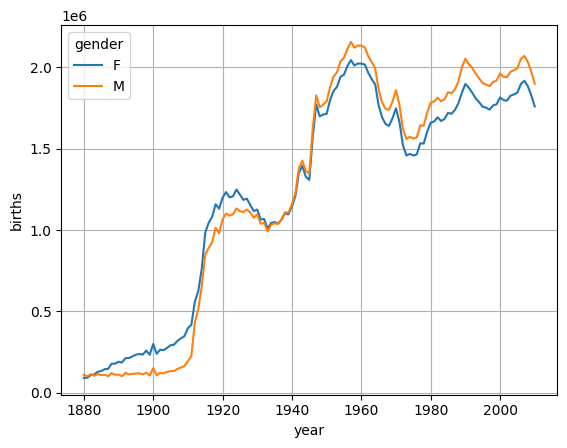

In [117]:
sns.lineplot(data = df_by_year__gender, x = 'year', y= 'births', hue = 'gender')
plt.grid()
plt.show()

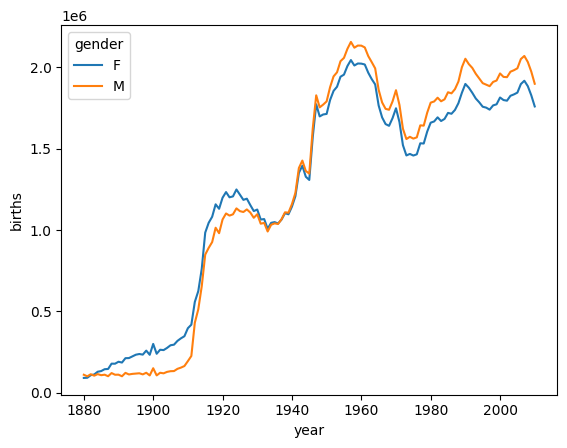

In [120]:
# seaborn 모듈의 그래프 함수들은 그룹별 통계(평균, 합계, ...) 기능을 가지고 있음.

sns.lineplot(data = yob_df, x= 'year', y = 'births', hue = 'gender', estimator = 'sum', errorbar = None)
plt.show()